# Аренда квартир в Москве

Данные по аренде квартир от 27/02/2022

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Anacondaz\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


## 1. Данные

__Cсылка на данные:__ https://www.kaggle.com/datasets/timmofeyy/realestaterent

In [2]:
df = pd.read_csv("rent_apartment_moscow_2.csv")
df

,Unnamed: 0,metro,price,minutes,way,provider,fee_percent,views,storey,storeys,rooms,total_area,living_area,kitchen_area
0,0,Akademicheskaia,95000,10,walk,agency,0,36,7.0,25.0,3,120.000000,53.000000,17.000000
1,1,Dmitrovskaia,38000,10,walk,realtor,50,26,7.0,9.0,1,34.000000,18.000000,12.000000
2,2,Novye Cheremushki,70000,5,walk,agency,50,663,9.0,17.0,2,60.000000,32.000000,12.000000
3,3,Krasnopresnenskaia,100000,3,walk,realtor,0,2192,5.0,5.0,3,74.000000,30.000000,30.000000
4,4,Domodedovskaia,73000,17,walk,agency,40,92,10.0,14.0,3,71.000000,60.000000,10.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8193,8193,No data,450000,0,walk,agency,0,119,3.0,5.0,5,67.181777,67.181777,67.181777
8194,8194,No data,200000,0,walk,agency,0,81,30.0,86.0,2,67.181777,67.181777,67.181777
8195,8195,No data,179000,0,walk,agency,0,56,18.0,22.0,3,67.181777,67.181777,67.181777
8196,8196,No data,390000,0,walk,agency,0,32,16.0,19.0,3,67.181777,67.181777,67.181777


## 2. Обработка данных

Удаляем следующие данные:
- Индексы, которые не несут никакую информацию
- Колонку под названием `"total_area"` из-за содержания сомнительных данных в большом количестве строк _(например, общая площадь меньше жилой или соответствует последней)_
- Строки с пропущенными значениями
- Строки-дубликаты
- Данные по квартирам, которые содержат больше 95 этажей _(95 этажей - самое большое здание в Москве)_, т.е. явряются выбросами
- Данные по квартирам относительно которых отсутствует информация о ближайшей станции метро, т.к. не подходят для анализа и способны исказить результаты
- Данные по квартирам, у которых в колонке с количеством комнат отражены либо "0", либо "+", т.к. они не подлежат анализу
- Данные по квартирам, где жилая площадь равняется площади кухни, поскольку такие наблюдения могут исказить итоговый анализ _(таких наблюдений 1868 штук)_
- Данные исходя из которых добираться до метро необходимо на транспорте и при этом время до метро составляет 0 минут

In [3]:
df.drop(columns = ['Unnamed: 0', 'total_area'], inplace=True)
df.dropna(inplace = True)
df.drop_duplicates(inplace=True)

df = df[df.storeys <= 95]
df = df[df["metro"].str.contains("No data") == False]

df = df[df.rooms != '0']
df = df[df.rooms != '+']

df = df[df.living_area != df.kitchen_area] 

df.drop(df[(df.way == 'transport')&(df.minutes == 0)].index.to_list(), inplace=True)

df

,metro,price,minutes,way,provider,fee_percent,views,storey,storeys,rooms,living_area,kitchen_area
0,Akademicheskaia,95000,10,walk,agency,0,36,7.0,25.0,3,53.0,17.0
1,Dmitrovskaia,38000,10,walk,realtor,50,26,7.0,9.0,1,18.0,12.0
2,Novye Cheremushki,70000,5,walk,agency,50,663,9.0,17.0,2,32.0,12.0
4,Domodedovskaia,73000,17,walk,agency,40,92,10.0,14.0,3,60.0,10.0
5,Taganskaia,60000,10,walk,realtor,50,995,3.0,5.0,3,48.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6590,Maiakovskaia,90000,11,walk,Застройщик,30,45,6.0,12.0,3,64.0,12.0
6591,Sokol,60000,17,walk,Застройщик,30,21,13.0,30.0,2,45.0,10.0
6593,Lubianka,200000,6,walk,Застройщик,0,2,3.0,8.0,3,73.0,13.0
6594,Planernaia,50000,21,transport,owner,0,50,3.0,16.0,1,20.0,10.0


__Результат:__ от 8198 наблюдений осталось 3612

Анализируем данные по арендодателям:

In [4]:
df.provider.unique()

array(['agency                \xa0 \xa0 ',
       'realtor                \xa0 \xa0 ', 'owner                 ',
       'realtor                 ', 'agency                 ',
       'agency                \xa0 \xa0\xa0 \xa0 ',
       'Застройщик                 '], dtype=object)

Поскольку данные, содержащие одну и ту же информацию записаны по разному, необходимо заменить названия на одинаковые для дальнейшего анализа

In [5]:
df.provider.replace(['agency                 ', 
                     'agency                \xa0 \xa0 ', 
                     'agency                \xa0 \xa0\xa0 \xa0 '], 'agency', inplace=True)
df.provider.replace(['realtor                 ', 
                     'realtor                \xa0 \xa0 '], 'realtor', inplace=True)
df.provider.replace('owner                 ', 'owner', inplace=True)
df.provider.replace('Застройщик                 ', 'developer', inplace=True)

df.head()

,metro,price,minutes,way,provider,fee_percent,views,storey,storeys,rooms,living_area,kitchen_area
0,Akademicheskaia,95000,10,walk,agency,0,36,7.0,25.0,3,53.0,17.0
1,Dmitrovskaia,38000,10,walk,realtor,50,26,7.0,9.0,1,18.0,12.0
2,Novye Cheremushki,70000,5,walk,agency,50,663,9.0,17.0,2,32.0,12.0
4,Domodedovskaia,73000,17,walk,agency,40,92,10.0,14.0,3,60.0,10.0
5,Taganskaia,60000,10,walk,realtor,50,995,3.0,5.0,3,48.0,12.0


Заменяем текстовые и переменные типа `float` на переменные типа `int`

In [6]:
df[['storey', 
    'storeys', 
    'rooms', 
    'living_area', 
    'kitchen_area']] = df[['storey', 'storeys', 'rooms', 'living_area', 'kitchen_area']].astype(int)

df.head()

,metro,price,minutes,way,provider,fee_percent,views,storey,storeys,rooms,living_area,kitchen_area
0,Akademicheskaia,95000,10,walk,agency,0,36,7,25,3,53,17
1,Dmitrovskaia,38000,10,walk,realtor,50,26,7,9,1,18,12
2,Novye Cheremushki,70000,5,walk,agency,50,663,9,17,2,32,12
4,Domodedovskaia,73000,17,walk,agency,40,92,10,14,3,60,10
5,Taganskaia,60000,10,walk,realtor,50,995,3,5,3,48,12


## 3. Визуализация данных

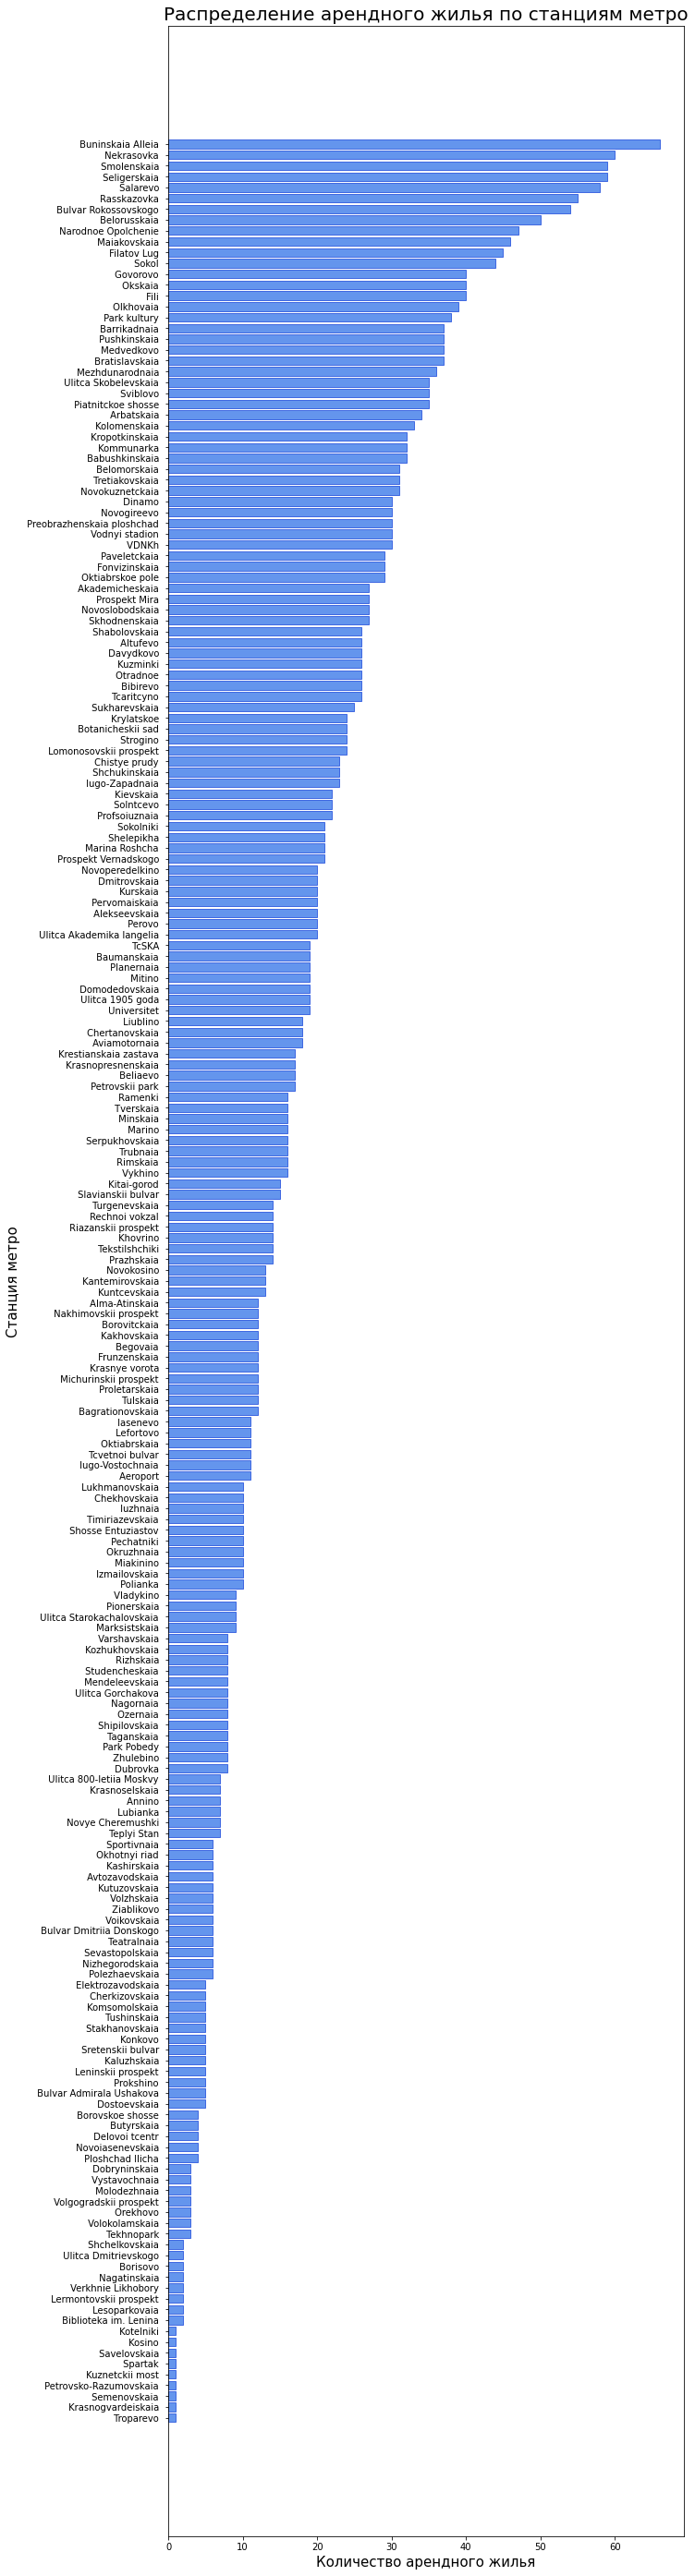

In [78]:
metro_stations = pd.DataFrame(df.metro.value_counts()).reset_index().sort_values(by='metro')
y = metro_stations['index'].to_list()
x = metro_stations['metro'].to_list()

fig, ax = plt.subplots(figsize=(10, 50))

ax.set_title('Распределение арендного жилья по станциям метро', fontsize=20)
ax.set_xlabel('Количество арендного жилья', fontsize=15)
ax.set_ylabel('Станция метро', fontsize=15)

plt.barh(y, x, color='cornflowerblue', edgecolor='royalblue')
plt.savefig('Metro.png', facecolor ="white", edgecolor ='white')

plt.show()

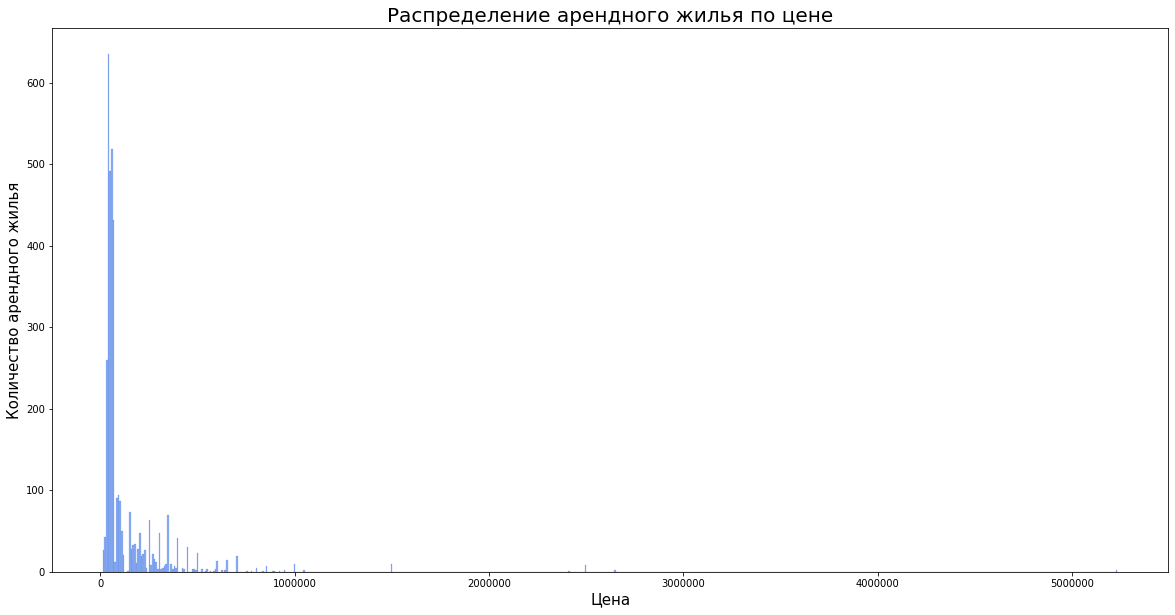

In [110]:
fig, ax = plt.subplots(figsize=(20, 10))

ax.set_title('Распределение арендного жилья по цене', fontsize=20)
ax.set_xlabel('Цена', fontsize=15)
ax.set_ylabel('Количество арендного жилья', fontsize=15)

sns.histplot(df.price[:100000],
             color='cornflowerblue',
             edgecolor='royalblue')

plt.ticklabel_format(style='plain', axis='x')
plt.savefig('Price.png', facecolor ="white", edgecolor ='white')

plt.show()

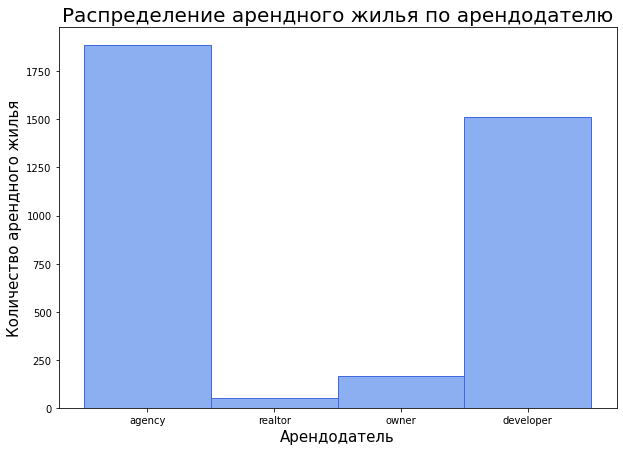

In [10]:
fig, ax = plt.subplots(figsize=(10, 7))

ax.set_title('Распределение арендного жилья по арендодателю', fontsize=20)
ax.set_xlabel('Арендодатель', fontsize=15)
ax.set_ylabel('Количество арендного жилья', fontsize=15)

sns.histplot(df.provider,
             color='cornflowerblue',
             edgecolor='royalblue')

plt.savefig('Provider.png', facecolor ="white", edgecolor ='white')

plt.show()

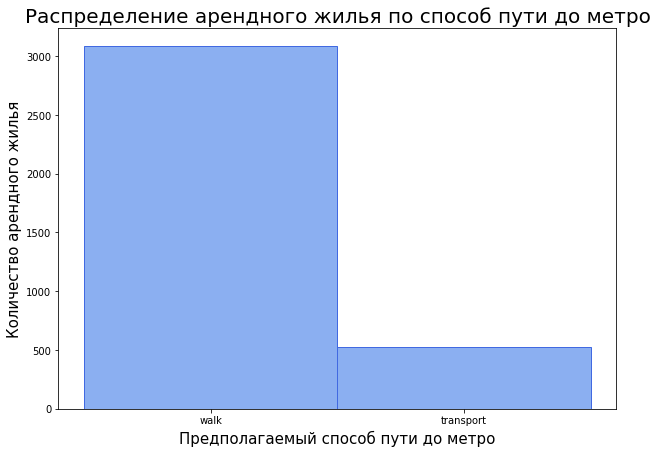

In [11]:
fig, ax = plt.subplots(figsize=(10, 7))

ax.set_title('Распределение арендного жилья по способ пути до метро', fontsize=20)
ax.set_xlabel('Предполагаемый способ пути до метро', fontsize=15)
ax.set_ylabel('Количество арендного жилья', fontsize=15)

sns.histplot(df.way,
             color='cornflowerblue',
             edgecolor='royalblue')

plt.savefig('Way.png', facecolor ="white", edgecolor ='white')

plt.show()

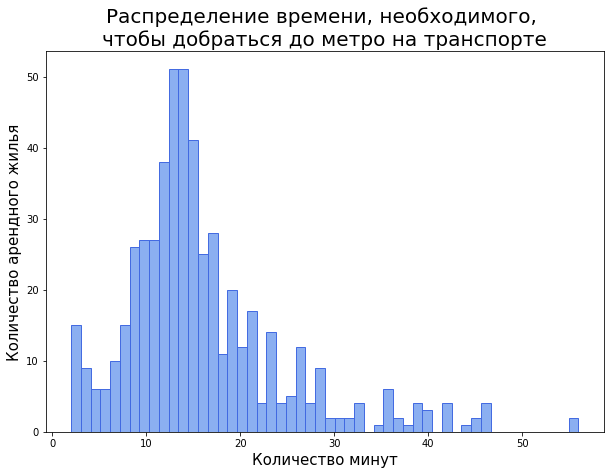

In [12]:
fig, ax = plt.subplots(figsize=(10, 7))

ax.set_title('Распределение времени, необходимого, \nчтобы добраться до метро на транспорте', fontsize=20)
ax.set_xlabel('Количество минут', fontsize=15)
ax.set_ylabel('Количество арендного жилья', fontsize=15)

df_t = df[df.way=='transport']
sns.histplot(df_t.minutes,
             bins=52,
             color='cornflowerblue',
             edgecolor='royalblue')

plt.savefig('Minutes_transport.png', facecolor ="white", edgecolor ='white')

plt.show()

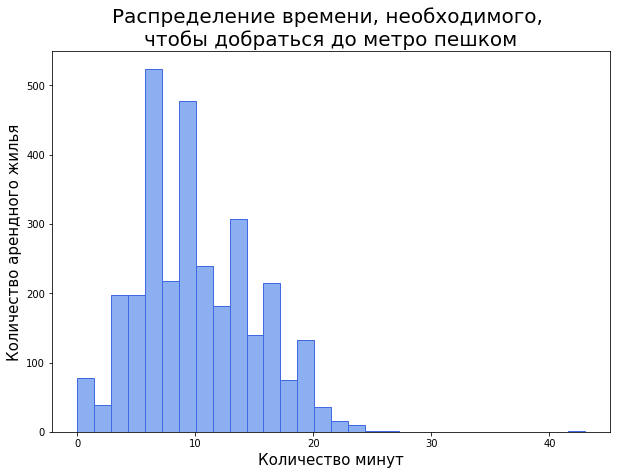

In [13]:
fig, ax = plt.subplots(figsize=(10, 7))

ax.set_title('Распределение времени, необходимого, \nчтобы добраться до метро пешком', fontsize=20)
ax.set_xlabel('Количество минут', fontsize=15)
ax.set_ylabel('Количество арендного жилья', fontsize=15)

df_w = df[df.way=='walk']
sns.histplot(df_w.minutes,
             bins=30,
             color='cornflowerblue',
             edgecolor='royalblue')

plt.savefig('Minutes_walk.png', facecolor ="white", edgecolor ='white')

plt.show()

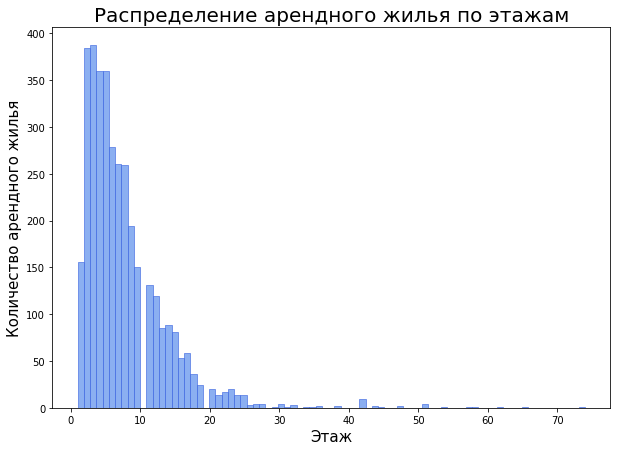

In [14]:
fig, ax = plt.subplots(figsize=(10, 7))

ax.set_title('Распределение арендного жилья по этажам', fontsize=20)
ax.set_xlabel('Этаж', fontsize=15)
ax.set_ylabel('Количество арендного жилья', fontsize=15)

sns.histplot(df.storey,
             color='cornflowerblue',
             edgecolor='royalblue')

plt.savefig('Storey.png', facecolor ="white", edgecolor ='white')

plt.show()

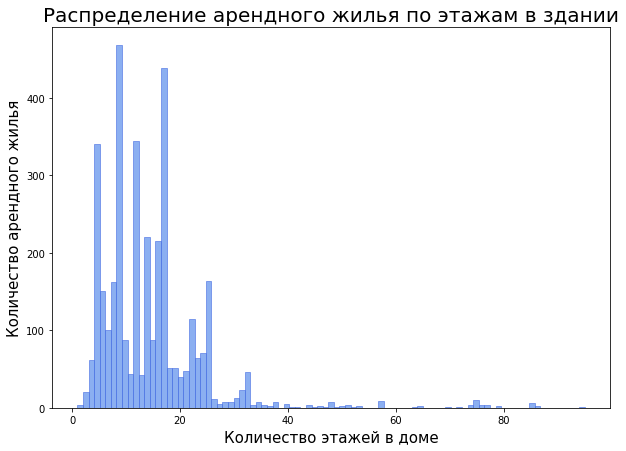

In [15]:
fig, ax = plt.subplots(figsize=(10, 7))

ax.set_title('Распределение арендного жилья по этажам в здании', fontsize=20)
ax.set_xlabel('Количество этажей в доме', fontsize=15)
ax.set_ylabel('Количество арендного жилья', fontsize=15)

sns.histplot(df.storeys,
             color='cornflowerblue',
             edgecolor='royalblue')

plt.savefig('Storeys.png', facecolor ="white", edgecolor ='white')

plt.show()

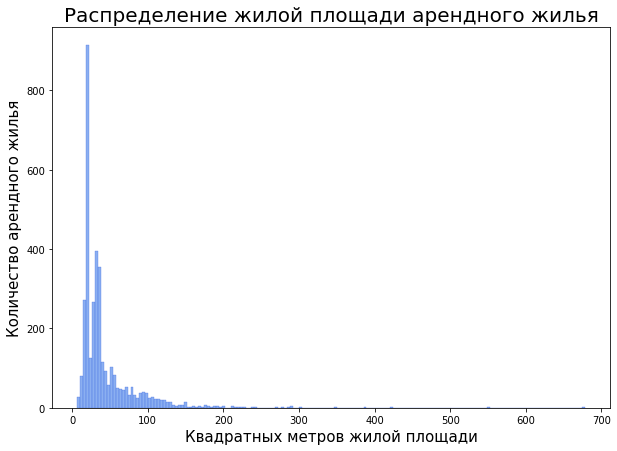

In [16]:
fig, ax = plt.subplots(figsize=(10, 7))

ax.set_title('Распределение жилой площади арендного жилья', fontsize=20)
ax.set_xlabel('Квадратных метров жилой площади', fontsize=15)
ax.set_ylabel('Количество арендного жилья', fontsize=15)

sns.histplot(df.living_area,
             color='cornflowerblue',
             edgecolor='royalblue')

plt.savefig('Living_area.png', facecolor ="white", edgecolor ='white')

plt.show()

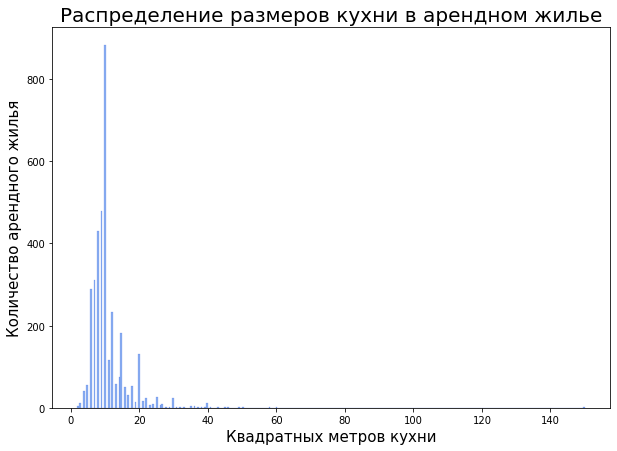

In [17]:
fig, ax = plt.subplots(figsize=(10, 7))

ax.set_title('Распределение размеров кухни в арендном жилье', fontsize=20)
ax.set_xlabel('Квадратных метров кухни', fontsize=15)
ax.set_ylabel('Количество арендного жилья', fontsize=15)

sns.histplot(df.kitchen_area,
             color='cornflowerblue',
             edgecolor='royalblue')

plt.savefig('Kitchen_area.png', facecolor ="white", edgecolor ='white')

plt.show()

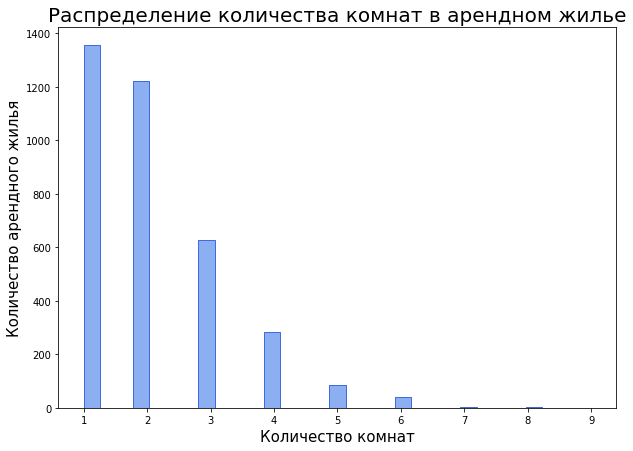

In [91]:
fig, ax = plt.subplots(figsize=(10, 7))

ax.set_title('Распределение количества комнат в арендном жилье', fontsize=20)
ax.set_xlabel('Количество комнат', fontsize=15)
ax.set_ylabel('Количество арендного жилья', fontsize=15)

sns.histplot(df.rooms,
             color='cornflowerblue',
             edgecolor='royalblue')

plt.savefig('Rooms.png', facecolor ="white", edgecolor ='white')

plt.show()

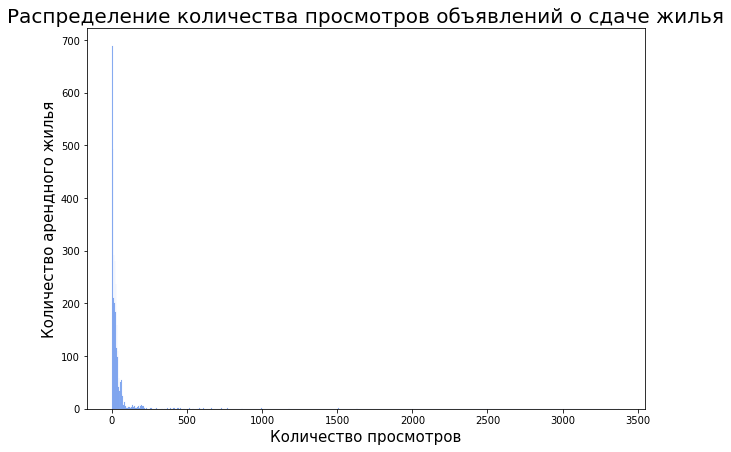

In [19]:
fig, ax = plt.subplots(figsize=(10, 7))

ax.set_title('Распределение количества просмотров объявлений о сдаче жилья', fontsize=20)
ax.set_xlabel('Количество просмотров', fontsize=15)
ax.set_ylabel('Количество арендного жилья', fontsize=15)

sns.histplot(df.views,
             color='cornflowerblue',
             edgecolor='royalblue')

plt.savefig('Views.png', facecolor ="white", edgecolor ='white')

plt.show()

## 4. Обработка зависимой переменной

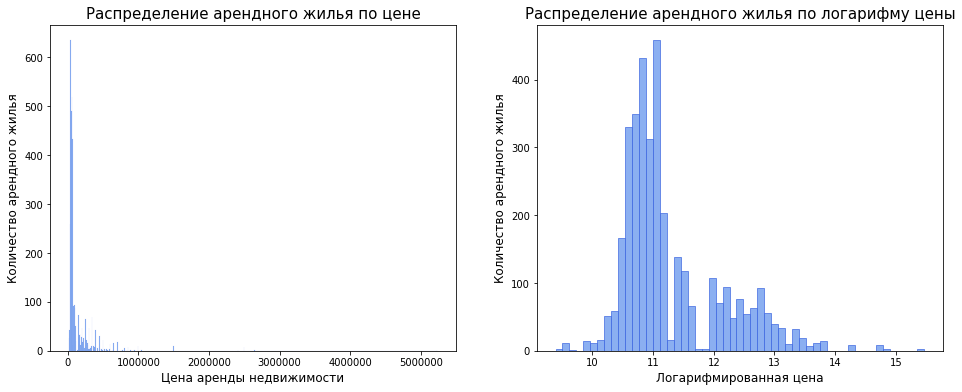

In [131]:
plt.figure(figsize = (16, 6))

plt.subplot(1, 2, 1)
sns.histplot(df.price, color='cornflowerblue', edgecolor='royalblue')
plt.ticklabel_format(style='plain', axis='x')
plt.xlabel('Цена аренды недвижимости', fontsize=12)
plt.ylabel('Количество арендного жилья', fontsize=12)
plt.title('Распределение арендного жилья по цене', fontsize=15)

plt.subplot(1, 2, 2)
sns.histplot(np.log1p(df.price), color='cornflowerblue', edgecolor='royalblue')
plt.xlabel('Логарифмированная цена', fontsize=12)
plt.ylabel('Количество арендного жилья', fontsize=12)
plt.title('Распределение арендного жилья по логарифму цены', fontsize=15)

plt.show()

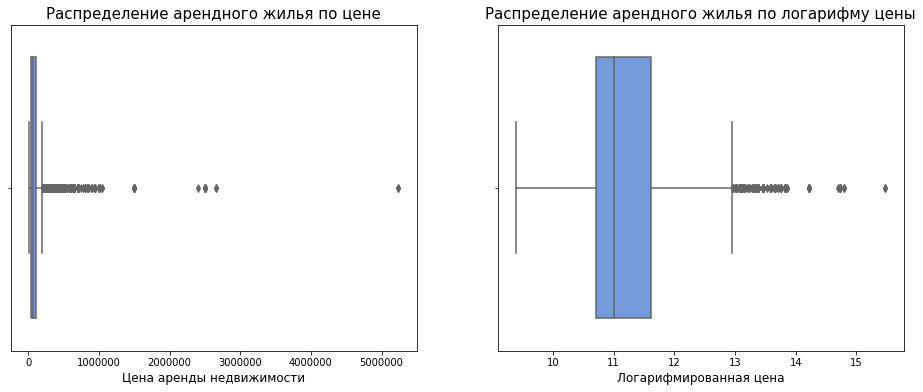

In [136]:
plt.figure(figsize = (16, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x=df.price, color='cornflowerblue')
plt.xlabel('Цена аренды недвижимости', fontsize=12)
plt.ticklabel_format(style='plain', axis='x')
plt.title('Распределение арендного жилья по цене', fontsize=15)

plt.subplot(1, 2, 2)
sns.boxplot(x=np.log1p(df.price), color='cornflowerblue')
plt.xlabel('Логарифмированная цена', fontsize=12)
plt.title('Распределение арендного жилья по логарифму цены', fontsize=15)

plt.show()

## 5. Что еще необходимо сделать?

1) Разделить по ценовым группам

2) Создать новые переменные:
 - Внутри центрального кольца или за его пределами (бинарная переменная)
 - Количество веток, пересекающихся на станции (здесь тоже можно сделать как бинарную одна ветка или больше)
 - Разделить по принадлежности к округам (ЦАО, ЗАО и т.д.)
 - Разделение на 1 этаж и остальные (бинарная переменная)
 - Разделение 1 комната или больше (бинарная перменная)